In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

https://drive.google.com/file/d/11yGWKoL-8lyFB7tAfTybcBdrTn-033QS/view?usp=sharing


https://drive.google.com/file/d/11yGWKoL-8lyFB7tAfTybcBdrTn-033QS/view?usp=drive_link

In [2]:
df = pd.read_csv('https://docs.google.com/uc?export=download&id=11yGWKoL-8lyFB7tAfTybcBdrTn-033QS')

In [3]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


DATA CLEANING


\nMelihat nilai unique dari masing" data


In [5]:
print(df['Cloud Cover'].unique())
print(df['Season'].unique())
print(df['Location'].unique())
print(df['Weather Type'].unique())

['partly cloudy' 'clear' 'overcast' 'cloudy']
['Winter' 'Spring' 'Summer' 'Autumn']
['inland' 'mountain' 'coastal']
['Rainy' 'Cloudy' 'Sunny' 'Snowy']


In [6]:
replacements = {
    'Cloud Cover': {
        'clear': 0,
        'partly cloudy': 1,
        'overcast': 2
    },
    'Season': {
        'Winter': 0,
        'Spring': 1,
        'Summer': 2,
        'Fall': 3
    },
    'Weather Type': {
        'Sunny': 0,
        'Cloudy': 1,
        'Rainy': 2,
        'Snowy': 3,
        'Stormy': 4
    }
}

df_weather = df.replace(replacements, inplace=False)
df_weather.head()


/tmp/ipython-input-3037525358.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_weather = df.replace(replacements, inplace=False)


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,1,1010.82,2,0,3.5,inland,2
1,39.0,96,8.5,71.0,1,1011.43,7,1,10.0,inland,1
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,mountain,0
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,coastal,0
4,27.0,74,17.0,66.0,2,990.67,1,0,2.5,mountain,2


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Weather Type'])
y = df['Weather Type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

df_train = X_train.copy()
df_test = X_test.copy()


In [8]:
df_train = df_train.replace(replacements, inplace=False)
df_test  = df_test.replace(replacements, inplace=False)
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [13]:
df_test.isnull().sum()
df_train.isnull().sum()


,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [17]:
print(df.columns.tolist())

['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season', 'Visibility (km)', 'Location', 'Weather Type']


In [18]:
df_train = df_train.drop(columns=['Location'])
df_train.head(1)


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km)
13143,-7.0,70,1.5,72.0,2,989.3,1,0,2.0


In [20]:
df_test = df_test.drop(columns=['Location'])
df_test.head(1)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km)
10788,26.0,72,9.0,69.0,1,996.4,3,0,4.0


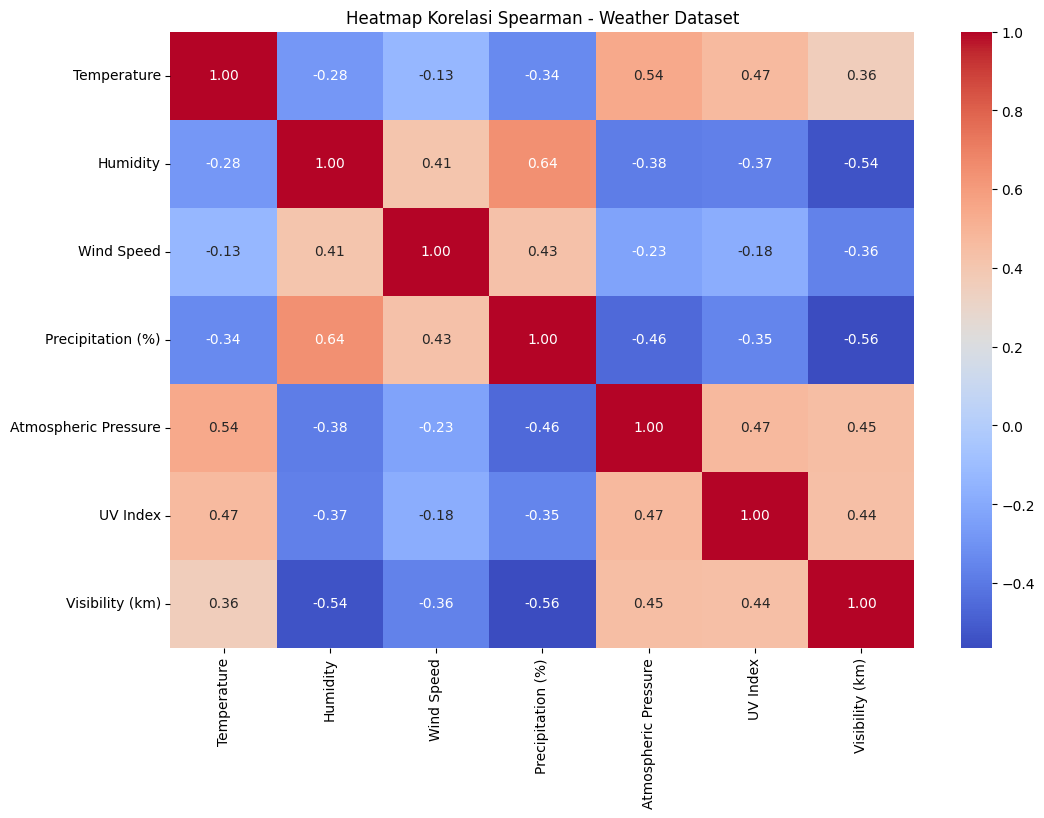

In [23]:
# Buat salinan agar aman
df_corr = df_train.copy()

# Drop kolom kategorikal sebelum korelasi
df_corr = df_corr.drop(columns=['Cloud Cover', 'Season', 'Location'], errors='ignore')

# Jika Weather Type masih ada di df_train, hapus juga
df_corr = df_corr.drop(columns=['Weather Type'], errors='ignore')

# Hitung matriks korelasi Spearman
correlation_matrix = df_corr.corr(method='spearman')

# Membuat heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap Korelasi Spearman - Weather Dataset")
plt.show()


/tmp/ipython-input-4162779038.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='Set2')   # y_train adalah label Weather Type


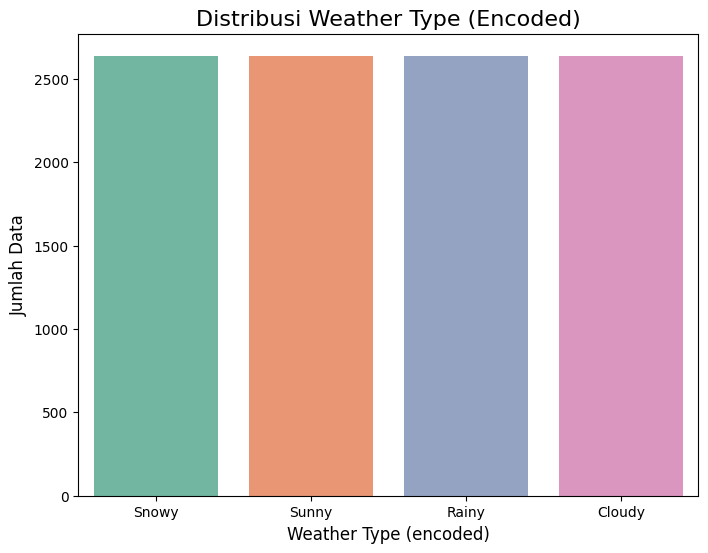

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette='Set2')   # y_train adalah label Weather Type

plt.title('Distribusi Weather Type (Encoded)', fontsize=16)
plt.xlabel('Weather Type (encoded)', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)

plt.show()


In [49]:
print("Before SMOTE:")
print(y_train.value_counts())

sm = SMOTE(random_state=42, k_neighbors=1) #set k_neighbors to 1
x_train_smote, y_train_smote = sm.fit_resample(x_train_scaled, y_train)

print("After SMOTE:")
print(y_train_smote.value_counts())

Before SMOTE:
Weather Type
Snowy     2640
Sunny     2640
Rainy     2640
Cloudy    2640
Name: count, dtype: int64
After SMOTE:
Weather Type
Snowy     2640
Sunny     2640
Rainy     2640
Cloudy    2640
Name: count, dtype: int64


In [43]:
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(x_train_smote, y_train_smote)

print("Best Params:", grid.best_params_)
print("Best Score (CV):", grid.best_score_)


Best Params: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Best Score (CV): 0.906060606060606


In [44]:
best_knn = grid.best_estimator_
best_knn.fit(x_train_smote, y_train_smote)

#prediksi
y_pred = best_knn.predict(x_test_scaled)

In [45]:
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      Cloudy       0.84      0.90      0.87       660
       Rainy       0.87      0.91      0.89       660
       Snowy       0.95      0.91      0.93       660
       Sunny       0.94      0.88      0.91       660

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



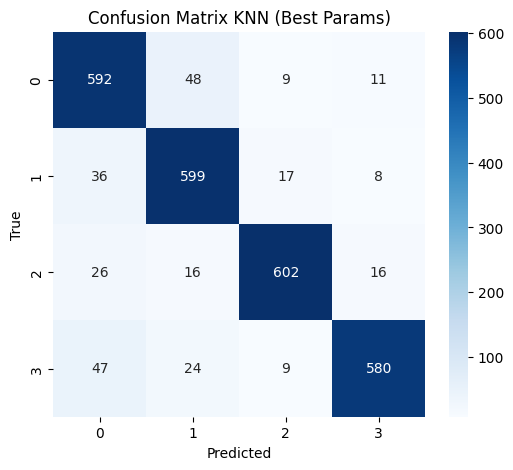

In [46]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix KNN (Best Params)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [47]:
cv_scores = cross_val_score(best_knn, x_train_smote, y_train_smote, cv=5)
print("Cross Validation Accuracy:", cv_scores.mean())
print("Std Dev:", cv_scores.std())

Cross Validation Accuracy: 0.906060606060606
Std Dev: 0.004046564511216214


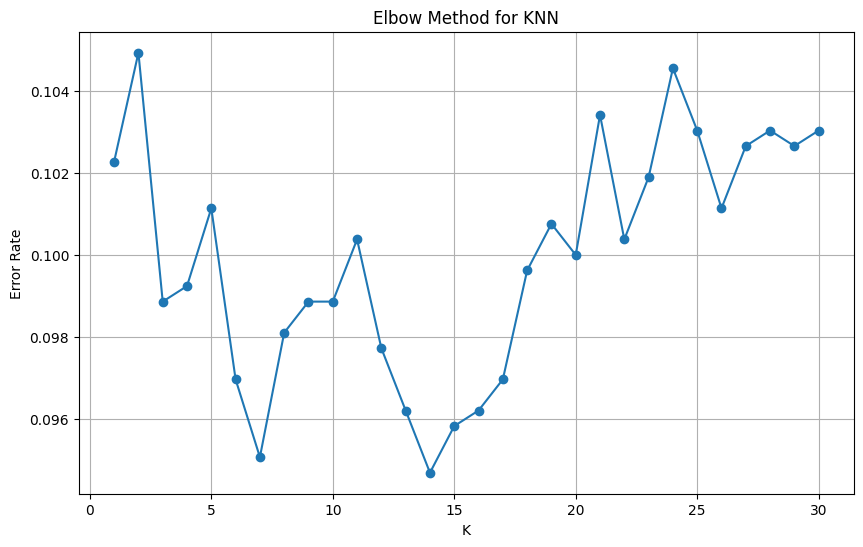

In [48]:
errors = []

for k in range(1, 31):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(x_train_smote, y_train_smote)
    pred = knn_temp.predict(x_test_scaled)
    errors.append(np.mean(pred != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1, 31), errors, marker='o')
plt.title("Elbow Method for KNN")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.grid(True)
plt.show()
